In [41]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import numpy as np
import seaborn as sns
import gmaps
import scipy.stats as stats
from scipy.stats import linregress

#from config import api_key

In [42]:
listings_df = pd.read_csv('./listings.csv')
listings_df.describe()

,id,scrape_id,host_id,host_response_rate,host_listings_count,host_total_listings_count,neighbourhood_group_cleansed,latitude,longitude,accommodates,...,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,jurisdiction_names,calculated_host_listings_count,reviews_per_month
count,3.585000e+03,3.585000e+03,3.585000e+03,3114.000000,3585.000000,3585.000000,0.0,3585.000000,3585.000000,3585.000000,...,2762.000000,2767.000000,2765.000000,2767.000000,2763.000000,2764.000000,0.0,0.0,3585.000000,2829.000000
mean,8.440875e+06,2.020000e+13,2.492311e+07,0.949891,58.902371,58.902371,NaN,42.340032,-71.084818,3.041283,...,9.431571,9.258041,9.646293,9.646549,9.414043,9.168234,NaN,NaN,12.733891,1.970908
std,4.500787e+06,0.000000e+00,2.292781e+07,0.125177,171.119663,171.119663,NaN,0.024403,0.031565,1.778929,...,0.931863,1.168977,0.762753,0.735507,0.903436,1.011116,NaN,NaN,29.415076,2.120561
min,3.353000e+03,2.020000e+13,4.240000e+03,0.000000,0.000000,0.000000,NaN,42.235942,-71.171789,1.000000,...,2.000000,2.000000,2.000000,4.000000,2.000000,2.000000,NaN,NaN,1.000000,0.010000
25%,4.679319e+06,2.020000e+13,6.103425e+06,0.970000,1.000000,1.000000,NaN,42.329995,-71.105083,2.000000,...,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,NaN,NaN,1.000000,0.480000
50%,8.577620e+06,2.020000e+13,1.928100e+07,1.000000,2.000000,2.000000,NaN,42.345201,-71.078429,2.000000,...,10.000000,10.000000,10.000000,10.000000,10.000000,9.000000,NaN,NaN,2.000000,1.170000
75%,1.278953e+07,2.020000e+13,3.622147e+07,1.000000,7.000000,7.000000,NaN,42.354685,-71.062155,4.000000,...,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,NaN,6.000000,2.720000
max,1.493346e+07,2.020000e+13,9.385411e+07,1.000000,749.000000,749.000000,NaN,42.389982,-71.000100,16.000000,...,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,NaN,136.000000,19.150000


In [43]:
listings_df_clean = listings_df[['id', 'host_id', 'host_since', 'host_response_time', 'host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
                                'host_neighbourhood', 'host_listings_count', 'host_total_listings_count', 'host_has_profile_pic', 'host_identity_verified',
                                'neighbourhood_cleansed', 'zipcode', 'latitude', 'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
                                'bedrooms', 'beds', 'bed_type', 'price', 'security_deposit', 'cleaning_fee', 'guests_included', 'extra_people', 'minimum_nights',
                                'maximum_nights', 'availability_365', 'number_of_reviews', 'first_review', 'last_review', 'review_scores_rating', 
                                 'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 'review_scores_location',
                                 'review_scores_value', 'requires_license', 'instant_bookable', 'cancellation_policy', 'reviews_per_month']]
listings_df_clean['price'].describe()

count    3585.000000
mean      173.925802
std       148.331321
min        10.000000
25%        85.000000
50%       150.000000
75%       220.000000
max      4000.000000
Name: price, dtype: float64

In [44]:
ratings_clean = listings_df_clean.dropna(axis = 0, subset= ['review_scores_rating','host_response_rate'])
ratings_clean.head()

,id,host_id,host_since,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_neighbourhood,host_listings_count,host_total_listings_count,...,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,instant_bookable,cancellation_policy,reviews_per_month
1,3075044,2572247,6/7/2012,within an hour,1.0,100%,f,Roslindale,1,1,...,10.0,9.0,10.0,10.0,9.0,9.0,f,t,moderate,1.30
2,6976,16701,5/11/2009,within a few hours,1.0,88%,t,Roslindale,1,1,...,10.0,9.0,10.0,10.0,9.0,10.0,f,f,moderate,0.47
3,1436513,6031442,4/21/2013,within a few hours,1.0,50%,f,NaN,1,1,...,10.0,10.0,10.0,10.0,10.0,10.0,f,f,moderate,1.00
4,7651065,15396970,5/11/2014,within an hour,1.0,100%,t,Roslindale,1,1,...,10.0,10.0,10.0,10.0,9.0,10.0,f,f,flexible,2.25
5,12386020,64200298,3/23/2016,within a few hours,1.0,95%,t,Roslindale,2,2,...,10.0,10.0,10.0,10.0,9.0,10.0,f,f,flexible,1.70


In [45]:
# Property types pie chart
prop = ratings_clean['property_type'].unique()
prop_type = ratings_clean.dropna(axis = 0, subset= ['property_type'])

# Collapsing smallest four property types into other
prop_type = prop_type.replace({'Villa': 'Other', 'Dorm': 'Other', 'Entire Floor': 'Other', 'Guesthouse': 'Other' })
prop_count = prop_type['property_type'].value_counts()
count = list(prop_count)
count
prop_type.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2550 entries, 1 to 3583
Data columns (total 45 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id                           2550 non-null   int64  
 1   host_id                      2550 non-null   int64  
 2   host_since                   2550 non-null   object 
 3   host_response_time           2550 non-null   object 
 4   host_response_rate           2550 non-null   float64
 5   host_acceptance_rate         2550 non-null   object 
 6   host_is_superhost            2550 non-null   object 
 7   host_neighbourhood           2323 non-null   object 
 8   host_listings_count          2550 non-null   int64  
 9   host_total_listings_count    2550 non-null   int64  
 10  host_has_profile_pic         2550 non-null   object 
 11  host_identity_verified       2550 non-null   object 
 12  neighbourhood_cleansed       2550 non-null   object 
 13  zipcode           

In [46]:
neighboorhood_ratings = prop_type[['neighbourhood_cleansed', 'review_scores_rating']]

In [47]:
jamaica_plain = neighboorhood_ratings['review_scores_rating'].loc[neighboorhood_ratings['neighbourhood_cleansed'] == 'Jamaica Plain']
south_end = neighboorhood_ratings['review_scores_rating'].loc[neighboorhood_ratings['neighbourhood_cleansed'] == 'South End']
back_bay = neighboorhood_ratings['review_scores_rating'].loc[neighboorhood_ratings['neighbourhood_cleansed'] == 'Back Bay']
dorchester= neighboorhood_ratings['review_scores_rating'].loc[neighboorhood_ratings['neighbourhood_cleansed'] == 'Dorchester']
fenway = neighboorhood_ratings['review_scores_rating'].loc[neighboorhood_ratings['neighbourhood_cleansed'] == 'Fenway']
beacon_hill = neighboorhood_ratings['review_scores_rating'].loc[neighboorhood_ratings['neighbourhood_cleansed'] == 'Beacon Hill']
allston = neighboorhood_ratings['review_scores_rating'].loc[neighboorhood_ratings['neighbourhood_cleansed'] == 'Allston']
south_boston = neighboorhood_ratings['review_scores_rating'].loc[neighboorhood_ratings['neighbourhood_cleansed'] == 'South Boston']
east_boston = neighboorhood_ratings['review_scores_rating'].loc[neighboorhood_ratings['neighbourhood_cleansed'] == 'East Boston']
brighton = neighboorhood_ratings['review_scores_rating'].loc[neighboorhood_ratings['neighbourhood_cleansed'] == 'Brighton']
downtown = neighboorhood_ratings['review_scores_rating'].loc[neighboorhood_ratings['neighbourhood_cleansed'] == 'Downtown']
roxbury = neighboorhood_ratings['review_scores_rating'].loc[neighboorhood_ratings['neighbourhood_cleansed'] == 'Roxbury']
north_end = neighboorhood_ratings['review_scores_rating'].loc[neighboorhood_ratings['neighbourhood_cleansed'] == 'North End']
mission_hill = neighboorhood_ratings['review_scores_rating'].loc[neighboorhood_ratings['neighbourhood_cleansed'] == 'Mission Hill']
charlestown = neighboorhood_ratings['review_scores_rating'].loc[neighboorhood_ratings['neighbourhood_cleansed'] == 'Charlestown']
south_boston_waterfront = neighboorhood_ratings['review_scores_rating'].loc[neighboorhood_ratings['neighbourhood_cleansed'] == 'South Boston Waterfront']
stats.f_oneway(jamaica_plain, south_end, back_bay, dorchester, fenway, beacon_hill, allston, south_boston, east_boston, brighton, downtown, roxbury, north_end, mission_hill, charlestown, south_boston_waterfront)

F_onewayResult(statistic=7.43940323692705, pvalue=2.1997476184772181e-16)

In [48]:
final_data = prop_type[['id', 'price', 'host_response_rate', 'neighbourhood_cleansed', 'review_scores_rating', 'cancellation_policy',
                        'property_type', 'bedrooms']]
final_data.head()

,id,price,host_response_rate,neighbourhood_cleansed,review_scores_rating,cancellation_policy,property_type,bedrooms
1,3075044,65,1.0,Roslindale,94.0,moderate,Apartment,1.0
2,6976,65,1.0,Roslindale,98.0,moderate,Apartment,1.0
3,1436513,75,1.0,Roslindale,100.0,moderate,House,1.0
4,7651065,79,1.0,Roslindale,99.0,flexible,House,1.0
5,12386020,75,1.0,Roslindale,100.0,flexible,Condominium,1.0


In [49]:
avg_neighborhood = final_data.groupby('neighbourhood_cleansed', as_index = False).agg({'review_scores_rating':'mean'})
#avg_price = avg_neighborhood.sort_values('price', ascending = False)
avg_rating = avg_neighborhood.sort_values('review_scores_rating', ascending = False)
avg_rating

#avg_neighborhood.sort_values('review_scores_rating', ascending = False)

,neighbourhood_cleansed,review_scores_rating
13,Leather District,97.500000
24,West Roxbury,95.354839
18,Roslindale,95.285714
21,South Boston Waterfront,94.303571
12,Jamaica Plain,94.158672
20,South Boston,94.000000
14,Longwood Medical Area,94.000000
5,Charlestown,93.828571
3,Beacon Hill,93.602484
17,North End,93.371429


In [50]:
final_data_1 = final_data.loc[final_data['neighbourhood_cleansed'] != 'Leather District']
final_data_2 = final_data_1.loc[final_data_1['neighbourhood_cleansed'] != 'Longwood Medical Area']
final_data_3 = final_data_2.loc[final_data_2['neighbourhood_cleansed'] != 'Bay Village']
final_data_4 = final_data_3.loc[final_data_3['neighbourhood_cleansed'] != 'Mattapan']
final_data_5 = final_data_4.loc[final_data_4['neighbourhood_cleansed'] != 'Hyde Park']
final_data_6 = final_data_5.loc[final_data_5['neighbourhood_cleansed'] != 'West End']
final_data_7 = final_data_6.loc[final_data_6['neighbourhood_cleansed'] != 'West Roxbury']
final_data_8 = final_data_7.loc[final_data_7['neighbourhood_cleansed'] != 'Chinatown']
final_data_9 = final_data_8.loc[final_data_8['neighbourhood_cleansed'] != 'Roslindale']

final_data_9

,id,price,host_response_rate,neighbourhood_cleansed,review_scores_rating,cancellation_policy,property_type,bedrooms
57,594693,70,1.00,Jamaica Plain,93.0,strict,Apartment,1.0
58,2384581,95,0.93,Jamaica Plain,93.0,flexible,House,1.0
60,4262255,80,1.00,Jamaica Plain,99.0,moderate,Apartment,1.0
61,4000384,120,0.70,Jamaica Plain,97.0,flexible,House,1.0
62,6693305,65,1.00,Jamaica Plain,100.0,flexible,Apartment,1.0
...,...,...,...,...,...,...,...,...
3573,14504583,65,1.00,Charlestown,80.0,flexible,Apartment,1.0
3575,5280827,69,0.96,Charlestown,70.0,strict,Apartment,1.0
3578,14536322,85,1.00,Allston,100.0,strict,House,1.0
3580,8373729,69,0.96,Charlestown,90.0,strict,Apartment,1.0


In [51]:
avg_neighborhood = final_data_9.groupby('neighbourhood_cleansed', as_index = False).agg({'review_scores_rating':'median'})
#avg_price = avg_neighborhood.sort_values('price', ascending = False)
avg_rating = avg_neighborhood.sort_values('review_scores_rating', ascending = False)
avg_rating


,neighbourhood_cleansed,review_scores_rating
14,South Boston Waterfront,97.5
4,Charlestown,96.0
9,Jamaica Plain,96.0
13,South Boston,96.0
2,Beacon Hill,95.0
3,Brighton,95.0
15,South End,95.0
0,Allston,94.0
11,North End,94.0
6,Downtown,93.5


Text(0.5, 1.0, 'Rating By Neighborhood')

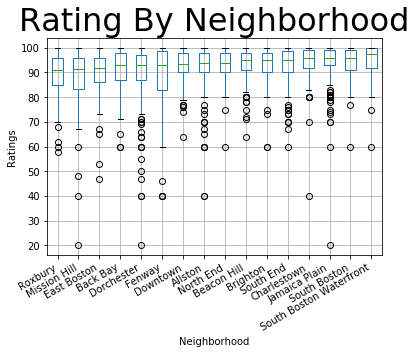

In [52]:
def boxplot_sorted(final_data_9, by, column, rot=0):
    # use dict comprehension to create new dataframe from the iterable groupby object
    # each group name becomes a column in the new dataframe
    df2 = pd.DataFrame({col:vals[column] for col, vals in final_data_9.groupby(by)})
    # find and sort the median values in this new dataframe
    meds = df2.median().sort_values()
    # use the columns in the dataframe, ordered sorted by median value
    # return axes so changes can be made outside the function
    return df2[meds.index].boxplot(rot=rot, return_type="axes")
axes = boxplot_sorted(final_data_9, by=["neighbourhood_cleansed"], column="review_scores_rating")
plt.xticks(rotation=30, horizontalalignment='right')
plt.xlabel("Neighborhood")
plt.ylabel("Ratings")
plt.title("Rating By Neighborhood", fontsize= 32)

In [53]:
neighboorhood_price = final_data_9[['neighbourhood_cleansed', 'price']]
neighboorhood_price = neighboorhood_price.reset_index(drop=True)

In [54]:
jamaica_plain = neighboorhood_price['price'].loc[neighboorhood_price['neighbourhood_cleansed'] == 'Jamaica Plain']
south_end = neighboorhood_price['price'].loc[neighboorhood_price['neighbourhood_cleansed'] == 'South End']
back_bay = neighboorhood_price['price'].loc[neighboorhood_price['neighbourhood_cleansed'] == 'Back Bay']
dorchester= neighboorhood_price['price'].loc[neighboorhood_price['neighbourhood_cleansed'] == 'Dorchester']
fenway = neighboorhood_price['price'].loc[neighboorhood_price['neighbourhood_cleansed'] == 'Fenway']
beacon_hill = neighboorhood_price['price'].loc[neighboorhood_price['neighbourhood_cleansed'] == 'Beacon Hill']
allston = neighboorhood_price['price'].loc[neighboorhood_price['neighbourhood_cleansed'] == 'Allston']
south_boston = neighboorhood_price['price'].loc[neighboorhood_price['neighbourhood_cleansed'] == 'South Boston']
east_boston = neighboorhood_price['price'].loc[neighboorhood_price['neighbourhood_cleansed'] == 'East Boston']
brighton = neighboorhood_price['price'].loc[neighboorhood_price['neighbourhood_cleansed'] == 'Brighton']
downtown = neighboorhood_price['price'].loc[neighboorhood_price['neighbourhood_cleansed'] == 'Downtown']
roxbury = neighboorhood_price['price'].loc[neighboorhood_price['neighbourhood_cleansed'] == 'Roxbury']
north_end = neighboorhood_price['price'].loc[neighboorhood_price['neighbourhood_cleansed'] == 'North End']
mission_hill = neighboorhood_price['price'].loc[neighboorhood_price['neighbourhood_cleansed'] == 'Mission Hill']
charlestown = neighboorhood_price['price'].loc[neighboorhood_price['neighbourhood_cleansed'] == 'Charlestown']
south_boston_waterfront = neighboorhood_price['price'].loc[neighboorhood_price['neighbourhood_cleansed'] == 'South Boston Waterfront']
stats.f_oneway(jamaica_plain, south_end, back_bay, dorchester, fenway, beacon_hill, allston, south_boston, east_boston, brighton, downtown, roxbury, north_end, mission_hill, charlestown, south_boston_waterfront)

F_onewayResult(statistic=40.41000142103462, pvalue=1.8521855938323337e-105)

Text(0.5, 1.0, 'Price By Neighborhood')

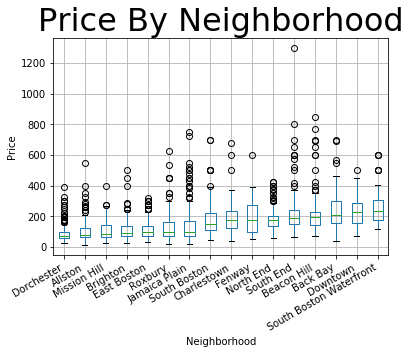

In [55]:
#neighborhood_price.boxplot(by="neighbourhood_cleansed", column="price")
def boxplot_sorted(neighboorhood_price, by, column, rot=0):
    # use dict comprehension to create new dataframe from the iterable groupby object
    # each group name becomes a column in the new dataframe
    df2 = pd.DataFrame({col:vals[column] for col, vals in neighboorhood_price.groupby(by)})
    # find and sort the median values in this new dataframe
    meds = df2.median().sort_values()
    # use the columns in the dataframe, ordered sorted by median value
    # return axes so changes can be made outside the function
    return df2[meds.index].boxplot(rot=rot, return_type="axes")
axes = boxplot_sorted(neighboorhood_price, by=["neighbourhood_cleansed"], column="price")
plt.xticks(rotation=30, horizontalalignment='right')
plt.xlabel("Neighborhood")
plt.ylabel("Price")
plt.title("Price By Neighborhood", fontsize= 32)

ValueError: could not convert string to float: 'Jamaica Plain'

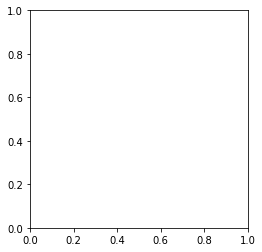

In [65]:
#Pie Chart for Prop-type in Neighborhood = South End
south_end_bar = final_data_9["neighbourhood_cleansed"]
south_end_bar

labels = final_data_9["property_type"].unique()
plt.pie(south_end_bar, labels=labels, autopct="%1.1f%%", shadow=True, startangle=140)
plt.tight_layout()
plt.show()

In [1]:
south_end_bar = avg_ratings.groupby['review_scores_rating'].loc[avg_ratings['neighbourhood_cleansed'] == 'South End']
south_end_bar

NameError: name 'neighboorhood_price' is not defined

In [9]:
#PRICE BY PROPERTY TYPE
south_end_final = final_data_9[['neighbourhood_cleansed', 'property type']]
south_end_final

bar_final

y_axis = bar1_data["review_scores_rating"]
x_axis = labels
plt.bar(x_axis, y_axis, color='b', alpha=0.7, align='center')
plt.title("Ratings by Property Type ")
plt.ylim(80, 100)
plt.xticks(rotation = 'vertical')
plt.ylabel("Ratings")
plt.xlabel("Property Type")

NameError: name 'final_data_9' is not defined